In [50]:
import os
import glob
import librosa
import numpy as np
import soundfile as sf

path = '/Users/kehindeelelu/Library/CloudStorage/OneDrive-ClemsonUniversity/RESEARCH/09_September_2023/Code/SELD'
path = ''

# Set the path to the folder containing audio files
folder_path = f'{path}/data_prep/audio'  # Replace with the path to your folder

# List all audio files in the folder (assuming they have the .wav extension)
audio_files = glob.glob(os.path.join(folder_path, '*.wav'))

# Initialize an empty array to store the combined audio
combined_audio = np.zeros(0)

curr_audio = audio_files[6]

# Loop through each audio file in the folder
for i in range(0, 11):
    # Load the audio using Librosa
    y, sr = librosa.load(curr_audio, sr=None)

    # Set the desired length (e.g., 6 seconds each)
    desired_length = 6 * sr  # Assuming all audio files should be 6 seconds long

    # Pad or trim the audio to the desired length
    y = librosa.util.fix_length(y, desired_length)

    # Add the current audio to the combined audio
    combined_audio = np.append(combined_audio, y)

# Save the resulting combined audio using soundfile
audio_files_ = curr_audio.split('/')[-1]
output_file = f'{path}/data_prep/control_test/{audio_files_}'  # Specify the desired output file path
sf.write(output_file, combined_audio, sr)  # Use the sample rate from the last loaded file

print("Combined audio saved to", output_file)


Combined audio saved to /Users/kehindeelelu/Library/CloudStorage/OneDrive-ClemsonUniversity/RESEARCH/09_September_2023/Code/SELD/data_prep/control_test/concretepumper.wav


In [14]:
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf

# Load the combined audio file
audio_file = f'{path}/data_prep/control_test/{audio_files_}'  # Replace with the path to your combined audio file
y, sr = librosa.load(audio_file, sr=None)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Combined Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


NameError: name 'path' is not defined

In [ ]:
import IPython.display as ipd
ipd.Audio(y, rate=sr)

In [3]:
import h5py
print(h5py.__version__)


# Scalar
scalar_path = '/Users/kehindeelelu/Library/CloudStorage/OneDrive-ClemsonUniversity/RESEARCH/09_September_2023/Code/SELD/dataset_root/feature/logmelgcc/32000fs_1024nfft_320hs_96melb/foa_scalar.h5'
with h5py.File(scalar_path, 'r') as hf_scalar:
    mean = hf_scalar['mean'][:]
    std = hf_scalar['std'][:]

3.9.0


In [24]:
import soundfile as sf

# Input audio file
input_file = "/Users/kehindeelelu/Library/CloudStorage/OneDrive-ClemsonUniversity/RESEARCH/09_September_2023/Code/SEL_D/data/split1_ir0_ov1_1.wav"

# Start and end times (in seconds) for cutting
start_time = 23.5
end_time = 24.0

# Open the input audio file
with sf.SoundFile(input_file, 'r') as file:
    # Determine the sample rate and number of channels
    sample_rate = file.samplerate
    num_channels = file.channels

    # Calculate the start and end sample positions
    start_sample = int(start_time * sample_rate)
    end_sample = int(end_time * sample_rate)

    # Read the audio data for the specified time range
    file.seek(start_sample)
    audio_data = file.read(end_sample - start_sample, dtype='float32')

# Save the cut audio as a WAV file
output_file = "/Users/kehindeelelu/Library/CloudStorage/OneDrive-ClemsonUniversity/RESEARCH/09_September_2023/Code/SEL_D/data/clearthroat.wav"
sf.write(output_file, audio_data, sample_rate, subtype='PCM_24')

print("Cut and saved audio to", output_file)


Cut and saved audio to /Users/kehindeelelu/Library/CloudStorage/OneDrive-ClemsonUniversity/RESEARCH/09_September_2023/Code/SEL_D/data/clearthroat.wav


In [11]:
import IPython.display as ipd
ipd.Audio(output_file, rate=sr)
print(audio_data.shape, audio_data.T.shape)

(81600, 4) (4, 81600)


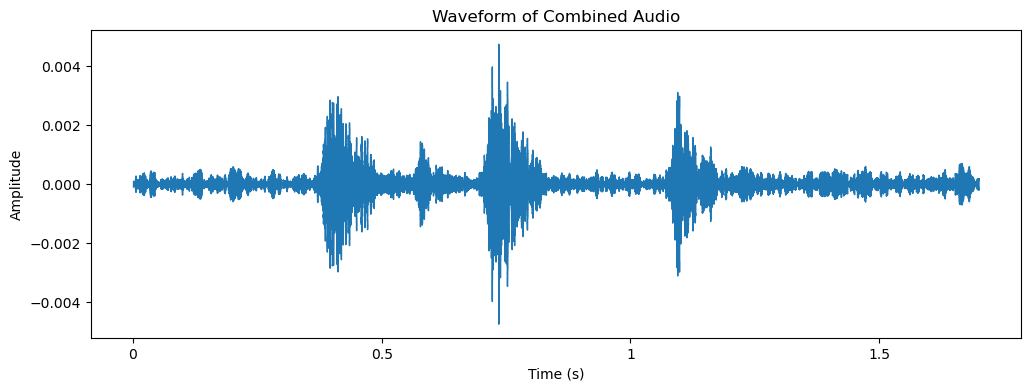

81600


In [17]:
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf

# Load the combined audio file
audio_file = output_file  # Replace with the path to your combined audio file
y, sr = librosa.load(audio_file, sr=None)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Combined Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

print(end_sample)